In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# Data inladen
bestand = "pad naar het bestand trends_watervogels_2022-2023.xlsx"


df = pd.read_excel(bestand, sheet_name="seizoensgetallen Nederland", skiprows=2)
df.columns = df.columns.astype(str)

soorten_watervogels = ["Grutto", "Tureluur", "Slobeend", "Kluut"]

df_landelijk = df.loc[df["Soort"].isin(soorten_watervogels)]
df_landelijk = df_landelijk[["Soort"] + [str(y) for y in range(1975, 2023)] + ["verandering vanaf 2011"]].reset_index(drop=True)
df_landelijk

,Soort,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,verandering vanaf 2011
0,Slobeend,10827.448852,9032.534736,8213.548696,7307.621700,9104.132386,5569.827691,4474.278916,5476.120655,4811.680203,...,10038.933490,11393.784654,12224.703493,10027.384525,12051.317134,12062.130154,12708.585685,12079.933607,12398.019210,3.7
1,Kluut,7751.173599,7423.455751,6423.516114,6670.702299,7301.502868,8472.723105,8106.657834,7648.083757,7127.779236,...,7256.538428,8187.651214,7592.370618,6651.612456,6209.941728,8503.952372,8397.358829,9472.611258,8681.482850,0.1
2,Grutto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5282.000000,4561.000000,4840.000000,4816.000000,5786.000000,6130.000000,5379.000000,5857.000000,5783.000000,-1
3,Tureluur,22694.617257,26194.581575,24436.831086,24947.924737,21134.971487,21628.598886,19341.407571,21767.695106,18733.962754,...,19333.599741,17059.818454,17272.309555,16637.188836,19151.853149,23073.612969,18106.776148,19060.139161,21491.600353,1


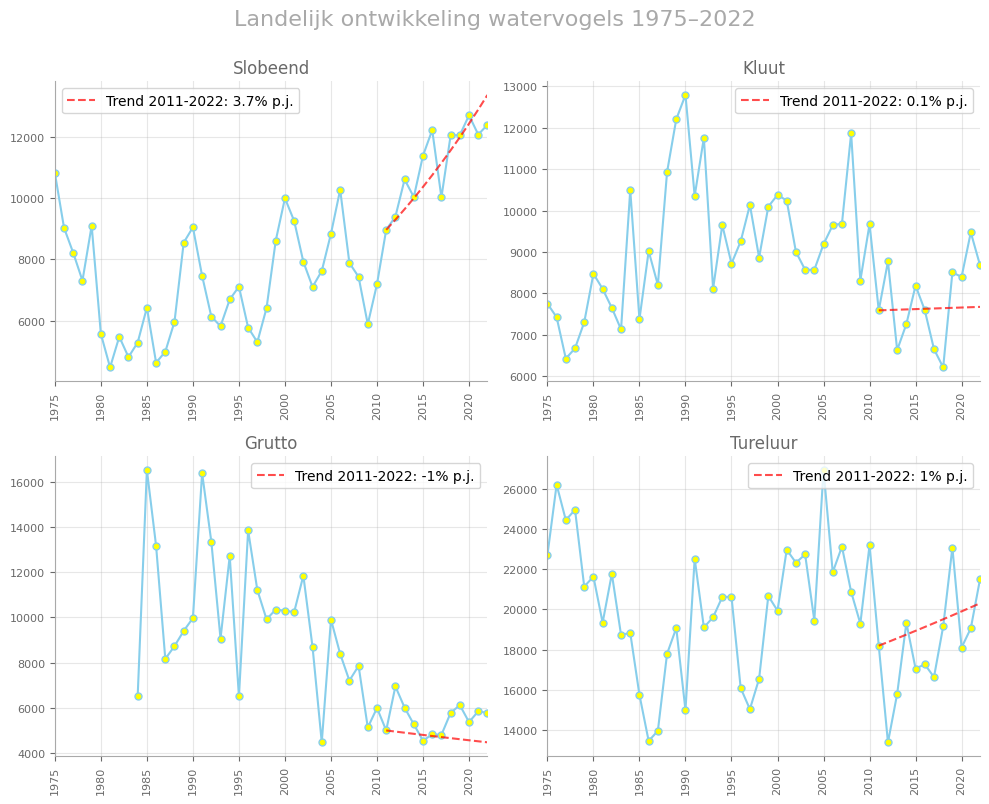

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

birds = df_landelijk['Soort'].unique()

for i, bird in enumerate(birds):
    ax = axes[i//2, i%2]
    bird_data = df_landelijk[df_landelijk['Soort'] == bird]
    years = bird_data.columns[1:-1]
    values = bird_data.iloc[0, 1:-1]
    
    base_value = values.iloc[-12]  # 12 jaar
    trend = bird_data.iloc[0, -1]
    trend_line = [base_value * (1 + trend/100) ** i for i in range(12)]
    
    ax.plot(years, values, color="skyblue", marker="o", markersize=5, mfc="yellow")
    ax.plot(years[-12:], trend_line, color="red", linestyle="--", alpha=0.7, label=f"Trend 2011-2022: {trend}% p.j.")
    ax.tick_params(axis="x", rotation=90, labelsize=8, colors="dimgrey")
    ax.tick_params(axis="y", labelsize=8, colors="dimgrey")
    ax.set_xticks(years[::5])
    ax.set_xlim(years.min(), years.max())
    ax.grid(axis="both", alpha=0.3) 
    ax.set_title(bird, color="dimgrey")
    ax.spines[["top","right"]].set_visible(False)
    ax.spines[["left","bottom"]].set_color("darkgrey")
    ax.legend()

fig.suptitle("Landelijk ontwikkeling watervogels 1975–2022", color="darkgrey", fontsize=16, y=1)
plt.tight_layout()
plt.show()